# Iris Data Classification using Perceptron


<img src="images/perceptron_model.png" class="img-responsive img-rounded">

# Neural Network

### Cost Function (Sum of squared Errors)

먼저 **Object function** $ J(w) $ (Sum of squared Errors - SSE) 를 정의합니다.<br>
이때 $ \phi(z^{(i)}) $ 는 Identity activation function 입니다.

$$ \begin{align} 
z &= \sum_{j=0} w_j x_j = w^T x + b \\
\phi(z^{(i)}) &= z^{(i)} \\
J(w) &= \frac{1}{N} \sum_i \left( y^{(i)} - \phi(z^{(i)}) \right)^2 \\
\end{align} $$

### Calculate Gradient with regard to weights $ w $

$$ \begin{align} 
\frac{\partial J}{\partial w_j} &= \frac{\partial}{\partial w_j}  \frac{1}{N} \sum_i \left(y^{(i)} - \phi(z^{(i)}) \right)^2 \\
&= \frac{2}{N} \sum_i \left( y^{(i)} - \phi(z^{(i)}) \right) \frac{\partial}{\partial w_j} \left(y^{(i)} - \phi(z^{(i)}) \right) \\
&= \frac{2}{N} \sum_i \left( y^{(i)} - \phi(z^{(i)}) \right) \frac{\partial}{\partial w_j} \left[ y^{(i)} - \sum_k \left( w^{(i)}_k x^{(i)}_k + b^{i} \right) \right] \\
&= \frac{2}{N} \sum_i \left( y^{(i)} - \phi(z^{(i)}) \right)(0 - (1 \cdot x^{(i)}_j + 0 ) ) \\
&= - \frac{2}{N} \sum_i \left( y^{(i)} - \phi(z^{(i)}) \right) \odot x^{(i)}_j
\end{align}$$

### Calculate Gradient with regard to bias $ b $

$$ \begin{align} 
\frac{\partial J}{\partial b_j} &= \frac{\partial}{\partial b_j}  \frac{1}{N} \sum_i \left(y^{(i)} - \phi(z^{(i)}) \right)^2 \\
&= \frac{2}{N} \sum_i \left( y^{(i)} - \phi(z^{(i)}) \right) \frac{\partial}{\partial b_j} \left(y^{(i)} - \phi(z^{(i)}) \right) \\
&= \frac{2}{N} \sum_i \left( y^{(i)} - \phi(z^{(i)}) \right) \frac{\partial}{\partial b_j} \left[ y^{(i)} - \sum_k \left( w^{(i)}_k x^{(i)}_k + b^{i} \right) \right] \\
&= \frac{2}{N} \sum_i \left( y^{(i)} - \phi(z^{(i)}) \right)(0 - (0 + 1 ) ) \\
&= - \frac{2}{N} \sum_i \left( y^{(i)} - \phi(z^{(i)}) \right) 
\end{align}$$

### Update Weights

$$ \begin{align} 
\Delta w &= - \eta \nabla J(w)  \\
w &= w + \Delta w
\end{align}$$

# Implementation

## Import

In [1]:
%pylab inline
import csv
import pandas as pd
import numpy as np
from sklearn import datasets
from IPython.display import Image

Populating the interactive namespace from numpy and matplotlib


## Data 

Iris Data..

50개의 rows마다 각기 다른 classes들을 갖고 있음.. 그러니까 따로  Iris-Setosa, Iris-Versicolour, Iris-Virginica를 구별짓는 column이 없음. 

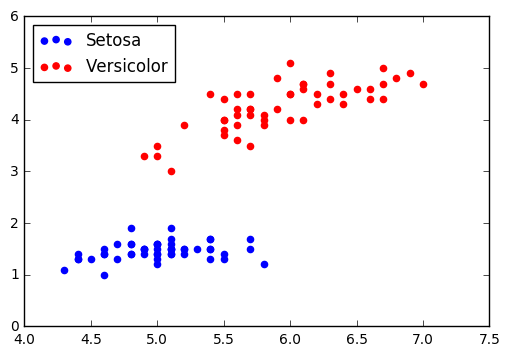

In [2]:
iris = datasets.load_iris()
data = iris.data

scatter(data[:50, 0], data[:50, 2], color='blue', label='Setosa')
scatter(data[50:100, 0], data[50:100, 2], color='red', label='Versicolor')
# scatter(data[100:150, 0], data[100:150, 2], color='#333333', label='Virginica')
legend(loc='upper left')

In [3]:
# Min-max Normalization
# for i in range(data.shape[1]):
#     data[:, i] = (data[:, i] - data[:,i].min()) / (data[:,i].max() - data[:,i].min())

X = data[:100, [0, 2]]
Y = iris.target[:100]
Y = np.where(Y == 0, -1, 1)

# Print Data Description
print(iris.DESCR[:982])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================



## Sigmoid and Derivative of sigmoidm

sigmoid function 는 다음과 같습니다.

$$ \sigma(x) = \dfrac{1}{1 + e^{-x}} $$

Derivative of sigmoid 는 다음과 같습니다.

$$ \dfrac{d}{dx}\sigma(x) = \sigma(x)(1 - \sigma(x)) $$

자세한 설명.. 

$$ \begin{align}
\dfrac{d}{dx} \sigma(x) &= \dfrac{d}{dx} \left[ \dfrac{1}{1 + e^{-x}} \right] \\
&= \dfrac{d}{dx} \left( 1 + \mathrm{e}^{-x} \right)^{-1} \\
&= -(1 + e^{-x})^{-2}(-e^{-x}) \\
&= \dfrac{e^{-x}}{\left(1 + e^{-x}\right)^2} \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \dfrac{e^{-x}}{1 + e^{-x}}  \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \dfrac{(1 + e^{-x}) - 1}{1 + e^{-x}}  \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \left( 1 - \dfrac{1}{1 + e^{-x}} \right) \\
&= \sigma(x) \cdot (1 - \sigma(x))
\end{align} $$

## Cost Function - Sum of squared Errors (SSE)

**Cost function** 은 **Sum of squared Errors (SSE)**를 사용합니다.

$$ J(w) = \frac{1}{2} \sum_i \left( y^{(i)} - \phi(z^{(i)}) \right)^2 $$

이때.. net input은..  $ z = \sum_{j=0} x_jw_j = w^Tx $  이고, <br>
$ \phi(z^{(i)}) $ 는 Activation function입니다.

## Backpropagation

Weight update는 다음 공식처럼 합니다.

$$ w = w + \Delta w $$ 

$ \Delta w $ 는 weight change 로서 learning rate를 곱한 negative gradient로 정의 됩니다. 

$$ \Delta w = -\eta \nabla J(w) $$

$$ \nabla J(w) = \frac{\partial J}{\partial w} = - \sum \left( y^{(i)} - \phi(z^{(i)}) \right) x^{(i)} $$

bias에 들어가는 값은 다음과 같습니다.

$$ bias = \eta(y - \phi(z^{(i)})) $$

cost: 1.16
cost: 0.1
cost: 0.0
cost: 0.0
cost: 0.0
cost: 0.0
cost: 0.0
cost: 0.0
cost: 0.0
cost: 0.0


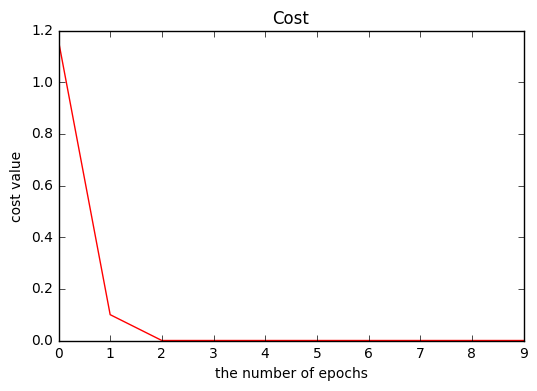

In [4]:
class Perceptron(object):
    
    def __init__(self, learning_rate=0.02):
        self.w = np.random.randn(2 + 1)
        self.eta = learning_rate
    
    def predict(self, xdata):
        phi = self.w[1:].dot(xdata.T) + self.w[0]
        net = np.where(phi > 0, 1, -1)
        return net                
    
    def relu(self, net):
        return np.maximum(net, 0)
    
    def train(self, x_trains, y_trains, n_episode=10):
        costs = []
        
        for self.step in range(n_episode):
            cost = 0
            
            # Shuffle
            rands = np.random.permutation(len(x_trains))
            x_trains = x_trains[rands]
            y_trains = y_trains[rands]
            
            for xi, yi in zip(x_trains, y_trains):
                output = self.predict(xi)
                                
                update = self.eta * np.sum(yi - output)
                self.w[1:] += update * xi
                self.w[0] += update
                
                cost += np.sum((yi - output)**2)/2.
                
            costs.append( cost/len(x_trains))
        return costs
        
            
    def save(self):
        np.save(open('iris.weights', 'wb'), perceptron.w)
        
    def load(self):
        self.w = np.load(open('iris.weights', 'rb'))
    
    def cost(self, predicted_ys, ys):
        ys - predicted_ys
        
perceptron = Perceptron()
# perceptron.load()
costs = perceptron.train(X, Y)

# Plotting Costs
title('Cost')
xlabel('the number of epochs')
ylabel('cost value')
plot(costs, color='red')

for cost in costs:
    print('cost:', cost)

### Evaluate

사실.. 얼마나 정확한지 맞추는것보다.. 더 아래쪽에 어떻게 그래프가 그려지는지 확인하는게 더 중요하다.<br>
1에 가까울수록 모두 맞은것.. 0으로 갈수록 틀린것

In [5]:
predicts = perceptron.predict(X) == Y
print('accuracy: ' + str(np.count_nonzero(predicts)/len(predicts)))

accuracy: 1.0


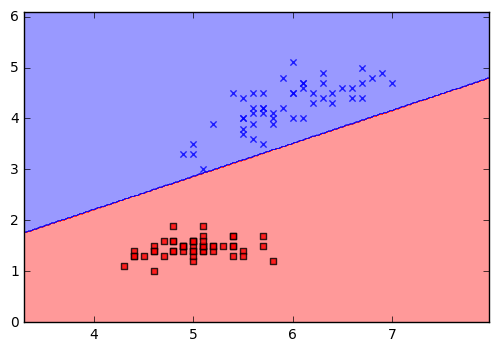

In [6]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

plot_decision_regions(X, Y, classifier=perceptron)

### References

* [A Neural Network in 11 lines of Python (Part 1)](http://iamtrask.github.io/2015/07/12/basic-python-network/)